# 숙제 Fashion-MNIST 데이터를 사용하여 딥러닝 모델 만들기

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import sklearn as sk
import sys

from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.datasets import fashion_mnist

# 0 : T-shirt/top, 1 : Trouser, 2 : Pullover, 3 : Dress, 4 : Coat, 5 : Sandal, # 6 : Shirt, 7 : Sneaker, 8 : Bag, 9 : Ankel boot


In [2]:
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()
print(X_train.shape, y_train.shape,X_test.shape, y_test.shape)

X_train = X_train.reshape(X_train.shape[0], -1)
X_test = X_test.reshape(X_test.shape[0], -1)
print(X_train.shape, y_train.shape,X_test.shape, y_test.shape)


(60000, 28, 28) (60000,) (10000, 28, 28) (10000,)
(60000, 784) (60000,) (10000, 784) (10000,)


In [3]:
X_train = X_train.astype('float64')/255
X_test = X_test.astype('float64')/255  # float로 데이터 타입 변경

y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

early_stop = EarlyStopping(monitor='val_loss', verbose=0, patience=10)

model = Sequential()  # flatten(input_shape=(28* 28)) 사용 가능
model.add(Dense(1500, activation='relu', input_dim=X_train.shape[1]))
# model.add(Dense(50, activation='relu'))
model.add(Dense(10, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
history=model.fit(X_train, y_train, epochs=100, batch_size=500, validation_split=0.25, callbacks=[early_stop],verbose=1)

print(model.evaluate(X_test, y_test))

Epoch 1/100
90/90 [==============================] - 4s 40ms/step - loss: 0.6020 - accuracy: 0.7910 - val_loss: 0.4464 - val_accuracy: 0.8416
Epoch 2/100
90/90 [==============================] - 3s 37ms/step - loss: 0.4070 - accuracy: 0.8582 - val_loss: 0.3935 - val_accuracy: 0.8578
Epoch 3/100
90/90 [==============================] - 3s 35ms/step - loss: 0.3635 - accuracy: 0.8708 - val_loss: 0.3828 - val_accuracy: 0.8649
Epoch 4/100
90/90 [==============================] - 3s 35ms/step - loss: 0.3336 - accuracy: 0.8797 - val_loss: 0.3620 - val_accuracy: 0.8718
Epoch 5/100
90/90 [==============================] - 3s 36ms/step - loss: 0.3190 - accuracy: 0.8854 - val_loss: 0.3756 - val_accuracy: 0.8586
Epoch 6/100
90/90 [==============================] - 3s 35ms/step - loss: 0.2999 - accuracy: 0.8905 - val_loss: 0.3554 - val_accuracy: 0.8757
Epoch 7/100
90/90 [==============================] - 3s 36ms/step - loss: 0.2790 - accuracy: 0.8989 - val_loss: 0.3215 - val_accuracy: 0.8844
Epoch 

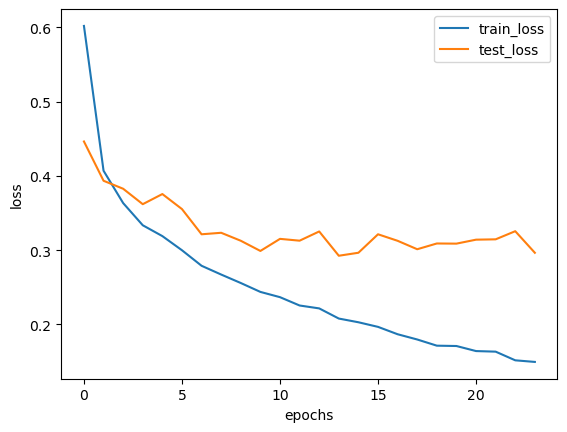

In [4]:
y_vloss = history.history['val_loss']
y_loss = history.history['loss']
x_len = np.arange(len(y_loss))

plt.plot(x_len, y_loss, label='train_loss')
plt.plot(x_len, y_vloss, label='test_loss')
plt.legend(loc='upper right')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.show()

In [5]:

#이미지 불러오는 방법

from PIL import Image

# 이미지 열기
im = Image.open('./data/img/shoose-1.jpg')
 
# 이미지 크기 출력
print(im.size)
im = im.resize((28, 28))
print(im.size)
# im

x = 255 - (np.array(im)[:,:,0]) #  숫자로 변환 시킴
print(x.shape)


(400, 431)
(28, 28)
(28, 28)


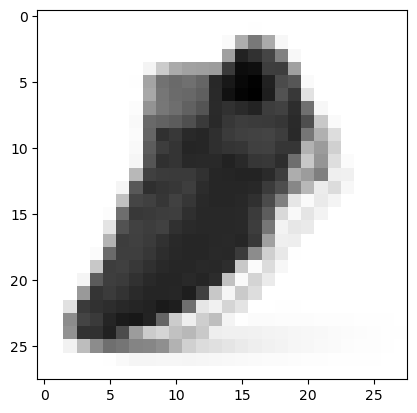

In [6]:
plt.imshow(x,cmap='Greys')


